## Observations and Insights

%matplotlib notebook

## Dependencies and starter code

# Observations

1)	i noticed that we had more data points gathered around the Capomulin drug regimen which will mean that we can better predict and draw conclusions that are closer to reality because we have more data points.
2)	I noticed a 25% decrease in the size of the tumor volume of a mice when they are treated with Capomulin which shows the effectiveness of the Drug. 
3)	I also noticed that the Infubinol treatment regimen had the most outliers which could lead to less accurate calculations especially when trying to form a prediction model.



In [31]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_study = pd.merge(study_results,mouse_metadata, on = "Mouse ID",how = "left")
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#putting the regimen and tumor into a df and soring by regimen
#sorting out my df
tumor_regimen = mouse_study[["Drug Regimen","Tumor Volume (mm3)"]]

#soring df by drug regimen
group_regimen = tumor_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()


group_regimen = group_regimen.drop(columns=["count",'min', '25%', '50%', '75%', 'max'])
#gettin the variance from the std
group_regimen["varaince"] = [x ** 2 for x in group_regimen["std"]]

#getting the median of the data series tumor volume 
group_regimen["Median"] = round(tumor_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),2)

#sorting out the df
group_regimen = group_regimen[['mean','Median','varaince', 'std']]

#egtting the standard error of the df 
group_regimen["SEM"] = tumor_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

group_regimen.head()

,mean,Median,varaince,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.56,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.78,39.290177,6.268188,0.469821
Infubinol,52.884795,51.82,43.128684,6.567243,0.492236
Ketapril,55.235638,53.70,68.553577,8.279709,0.603860
Naftisol,54.331565,52.51,66.173479,8.134708,0.596466


## Bar plots

Text(0.5, 1.0, 'standard calculation for each data pount')

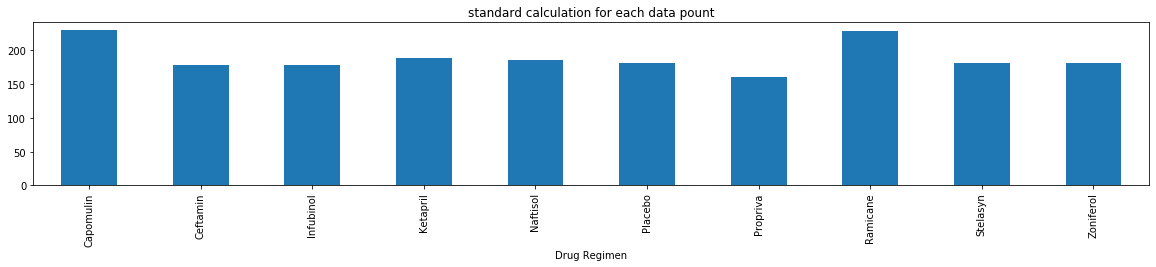

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#ploting the bar charts of the df with pandas
plot_bar = tumor_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
plot_bar.plot(kind="bar", figsize=(20,3))
plt.title("standard calculation for each data pount")

([<matplotlib.axis.XTick at 0x253e338e400>,
 <a list of 10 Text xticklabel objects>)

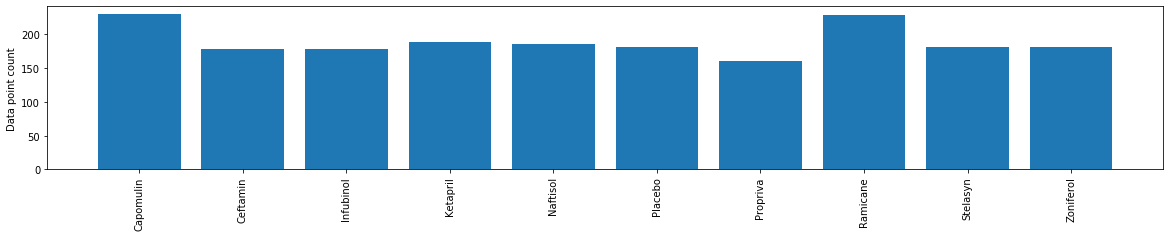

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#getting x axis
x_axis = np.arange(len(group_regimen))

#geting tick location values 
tick_locations = [ value for value in x_axis]

#plotting bar chart
plt.figure(figsize = (20,3))
plt.bar(x_axis, tumor_regimen.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count(), align = 'center')
plt.ylabel("Data point count")
plt.xticks(tick_locations, group_regimen.index, rotation = 'vertical')

## Pie plots

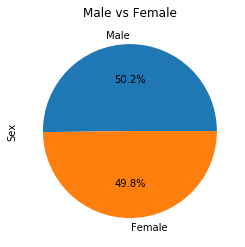

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count = mouse_metadata["Sex"].value_counts()
mouse_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male vs Female")
plt.show()
# plt.axes().set_ylabel('')


([<matplotlib.patches.Wedge at 0x253e2033c18>,
 [Text(-1.0999781124353174, -0.006939175976765592, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.5999880613283548, -0.003785005078235777, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

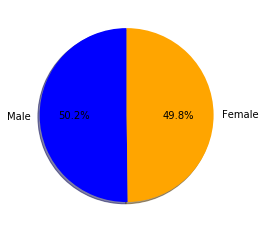

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_count = mouse_metadata["Sex"].value_counts()
labels = ["Female", "Male"]
# The colors of each section of the pie chart
colors = ["Blue", "orange"] #colors 
explode = (0,0)  
plt.pie(mouse_count.values, explode=explode, labels=mouse_count.index.values, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, outliers and boxplots

In [17]:
#sorting my data frame to get the needed columns for calculations
final_tumor = mouse_study.groupby(["Mouse ID"])[["Timepoint","Tumor Volume (mm3)"]].max()
final_tumor.reset_index()
final_tumor
final_merge = pd.merge(final_tumor, mouse_study[["Mouse ID", "Timepoint", "Drug Regimen"]], on =["Mouse ID","Timepoint"], how ="left")



final_tumor = mouse_study.groupby(["Mouse ID"])[["Timepoint","Tumor Volume (mm3)"]].max()
final_tumor.reset_index()
final_tumor
final_merge = pd.merge(final_tumor, mouse_study[["Mouse ID", "Timepoint", "Drug Regimen"]], on =["Mouse ID","Timepoint"], how ="left")


The of IQR of Capomulin is 1.75


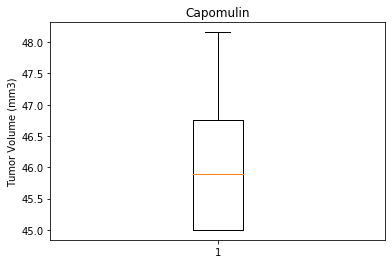

In [15]:
#filtering out Capomulin only
sorted_regimen = final_merge.loc[(final_merge["Drug Regimen"] == "Capomulin"),:]
grouped_mouse = sorted_regimen.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].max()

#calculating quartiles,boundaries and IQR
quartiles = grouped_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print ("The of IQR of Capomulin is " + str(iqr))

#plotting boxplot 
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(grouped_mouse["Tumor Volume (mm3)"])
plt.show()

The of IQR of Ramicane is 1.34


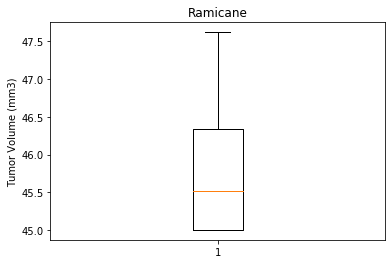

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#filtering out Ramicane only
sorted_regimen = final_merge.loc[(final_merge["Drug Regimen"] == "Ramicane"),:]
                        
grouped_mouse = sorted_regimen.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].max()

#calculating quartiles,boundaries and IQR
quartiles = grouped_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]

iqr = round(upperq-lowerq,2)

print ("The of IQR of Ramicane is " + str(iqr))
#plotting boxplot 
fig1, ax2 = plt.subplots()
ax2.set_title('Ramicane')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(grouped_mouse["Tumor Volume (mm3)"])
plt.show()

The of IQR of Infubinol is 11.48


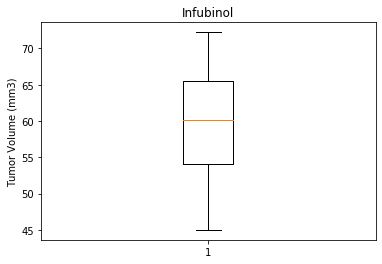

In [12]:
#filtering out Infubinolonly columns
sorted_regimen = final_merge.loc[(final_merge["Drug Regimen"] == "Infubinol"),:]
                        
grouped_mouse = sorted_regimen.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].max()

#calculating quartiles,boundaries and IQR
quartiles = grouped_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]

iqr = round(upperq-lowerq,2)

print ("The of IQR of Infubinol is " + str(iqr))
#plotting boxplot 
fig1, ax3 = plt.subplots()
ax3.set_title('Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(grouped_mouse["Tumor Volume (mm3)"])
plt.show()

The of IQR of Ceftamin is 15.58


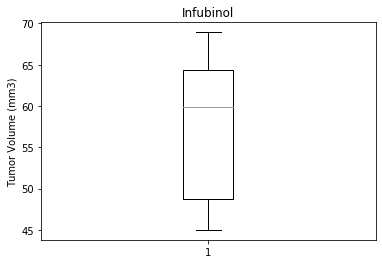

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#filtering out Infubinolonly columns
sorted_regimen = final_merge.loc[(final_merge["Drug Regimen"] == "Ceftamin"),:]
                        
grouped_mouse = sorted_regimen.groupby(["Drug Regimen","Mouse ID"])[["Tumor Volume (mm3)"]].max()

#calculating quartiles,boundaries and IQR
quartiles = grouped_mouse["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]

lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr)
outliers = grouped_mouse.loc[(grouped_mouse["Tumor Volume (mm3)"] < lower_bound), :]
iqr = round(upperq-lowerq,2)
#plotting boxplot 
fig1, ax4 = plt.subplots()
ax4.set_title('Infubinol')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(grouped_mouse["Tumor Volume (mm3)"])

print ("The of IQR of Ceftamin is " + str(iqr))

In [1]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

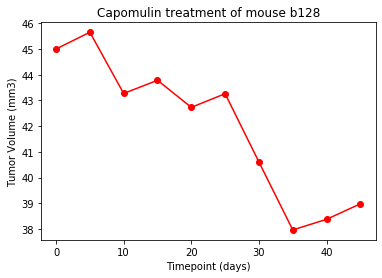

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#fitering out Capomulin for a single mouse 
single_mouse = mouse_study.loc[(mouse_study["Mouse ID"] == 'b128') & (mouse_study["Drug Regimen"] == "Capomulin"), :]
single_mouse

#plotting the tumor volume against the time point
plot_mouse  = plt.plot(single_mouse["Timepoint"] ,
                      single_mouse["Tumor Volume (mm3)"] , color="red", label= "Mouse b128", marker ='o')

plt.ylabel("Tumor Volume (mm3)")    
plt.xlabel("Timepoint (days)")  

plt.title("Capomulin treatment of mouse b128")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

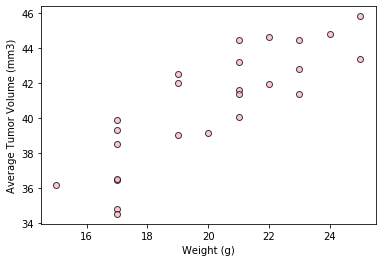

In [89]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#sorting out df for just capomulin
capomulin_study = mouse_study.loc[(mouse_study["Drug Regimen"] == "Capomulin"), :]

#calculating the mean Tumor volume and weight
group_capo = capomulin_study.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()

capomulin_study = group_capo

# plotting the scatter plot for tumor volume against weight
plt.scatter(capomulin_study["Weight (g)"], capomulin_study["Tumor Volume (mm3)"], marker="o", facecolors="lightpink", edgecolors="black", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


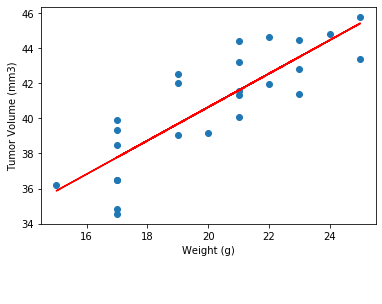

The correlation coefficient is 0.8419363424694718
The linear regression model is y = 0.95x + 21.55


In [88]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#sorting y and xvalues 
x_values = capomulin_study["Weight (g)"]
y_values = capomulin_study["Tumor Volume (mm3)"]
#calling the linregress function 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#generating the line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plotting the values 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (18,30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
#printing results 
print("The correlation coefficient is " + str(rvalue))
print("The linear regression model is " + str(line_eq))